# Dummy Project

### Steps-
1. Preprocess + EDA + Feature Selection
2. extracting input and output values
3. Scaling them
4. Train-test split
5. Model evaluation and selection
6. Model Deployment

In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('data\Placement.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [7]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


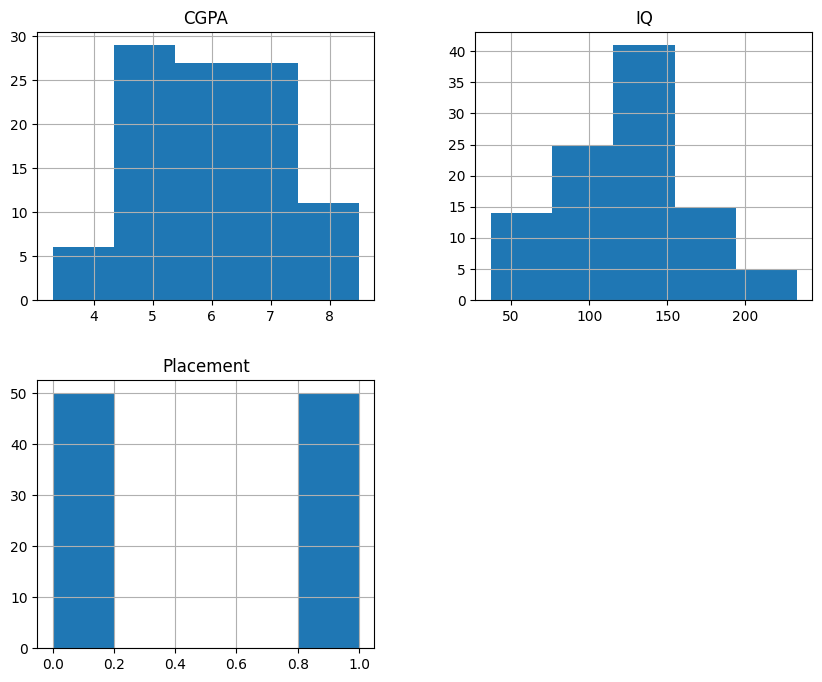

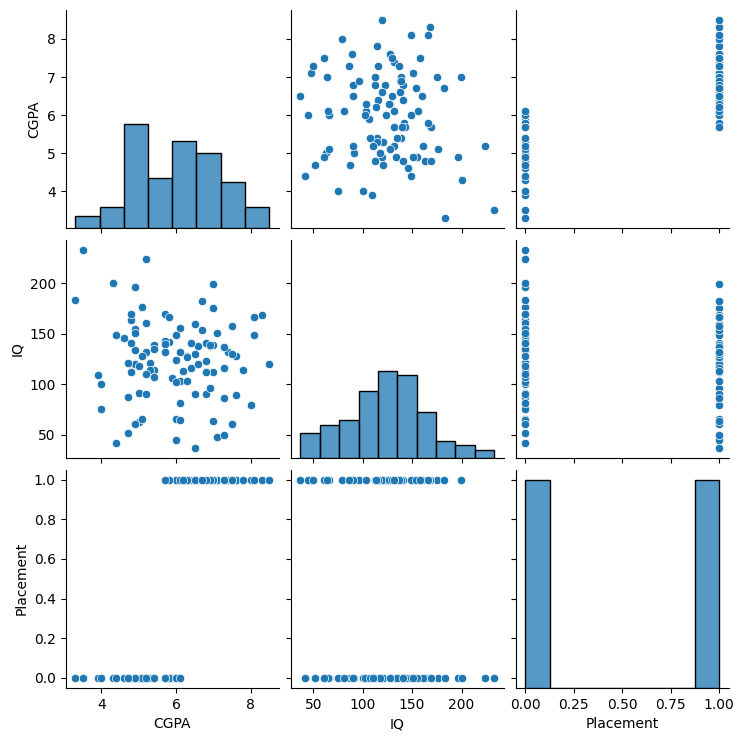

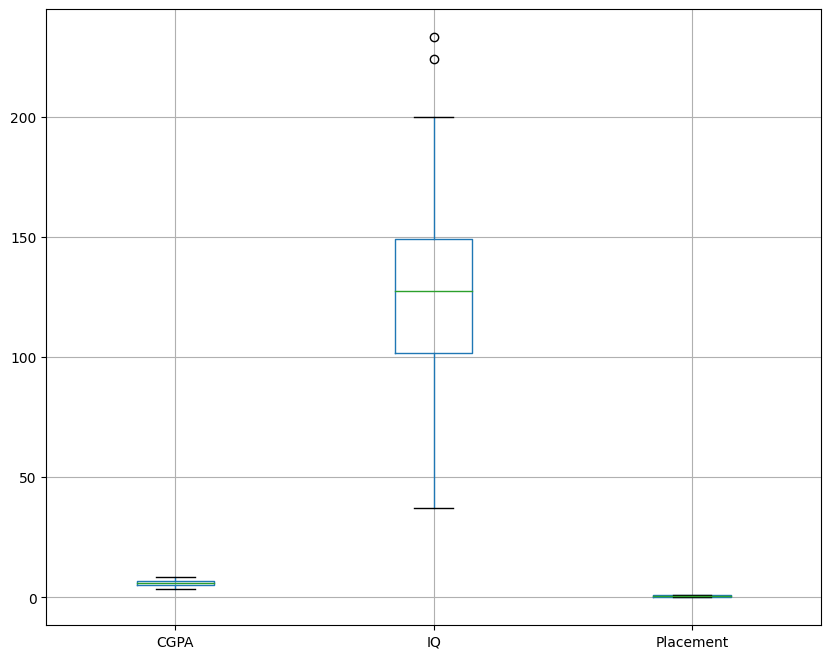

In [10]:
# prompt: create visualizaitons for given data

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each numeric column
df.hist(figsize=(10, 8), bins=5)
plt.show()

# Scatter plot for each pair of numeric columns
sns.pairplot(df)
plt.show()

# Boxplot for each numeric column
df.boxplot(figsize=(10, 8))
plt.show()


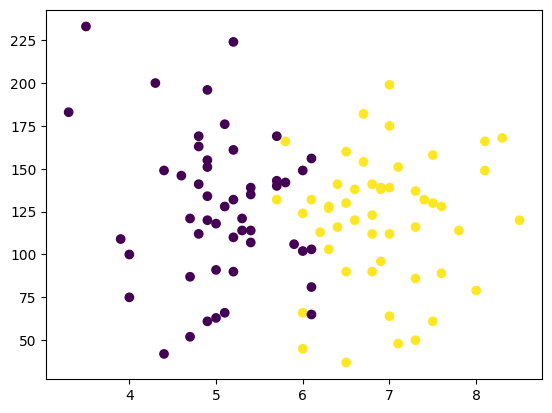

In [11]:
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train

,CGPA,IQ
35,6.8,90
11,6.9,138
84,5.7,169
44,7.5,61
73,4.9,61
...,...,...
43,6.8,141
22,4.9,120
72,7.3,116
15,5.1,176


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [17]:
lr.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [18]:
y_test

83    1
30    1
56    0
24    0
16    0
23    0
2     0
27    1
28    0
13    1
99    1
92    0
76    0
14    0
0     1
21    1
3     1
29    1
61    1
79    1
Name: Placement, dtype: int64

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(X_test),y_test)

0.9

In [22]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DecsionBoundary

<AxesSubplot:>

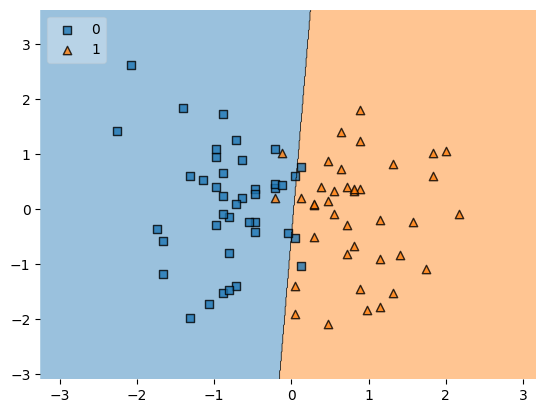

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=lr, legend=2)

In [25]:
# deploying
import pickle
pickle.dump(lr,open('models/dummy_project_model.pkl','wb'))